### NLTK 영문 형태소 처리

In [3]:
!pip install wordcloud

In [4]:
from nltk import Text
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = (14,4) #차트 전체크기

In [6]:
f=open('c:/py_data/test.txt','r')
txt=f.read()   #readline(),  readlines()
f.close
print(txt)

n land And now I understand What you tried to say to me How you suffered for yo
you suffered for your sanity How you tried to set them free They would not list
g hand And now I understand What you tried to say to me How you suffered for yo
you suffered for your sanity How you tried to set them free They would not list
snow And now I think I know What you tried to say to me How you suffered for yo
you suffered for your sanity How you tried to set them free They would not list


In [7]:
retokenize = RegexpTokenizer("[\w]+")
text = Text(retokenize.tokenize(txt))
text

<Text: n land And now I understand What you...>

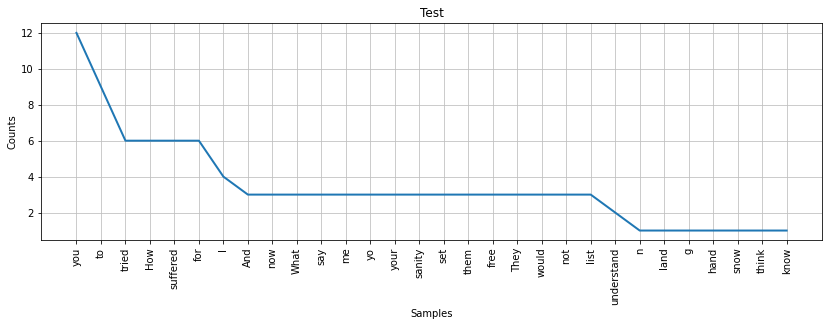

In [8]:
plt.title('Test')
text.plot()
plt.show()

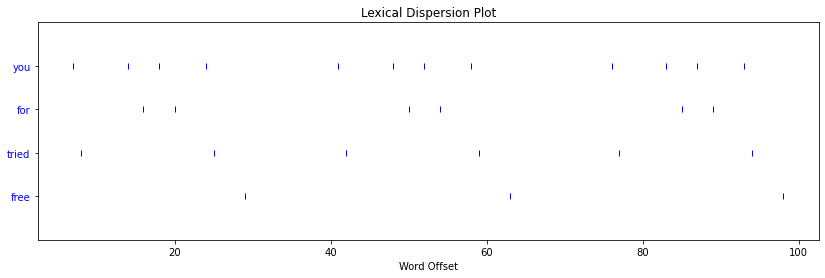

In [9]:

# 단어가 사용된 위치 시각화
text.dispersion_plot(['you', 'for','tried','free'])

### NLTK 자연어 패키지
- 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
- 말뭉치: 예제 파일 제공
- 토큰 생성: 문자열 단위를 토큰(token), 문자열을 토큰으로 나누는 작업
- 형태소 분석: 언어학에서 일정한 의미가 있는 가장 작은 말의 단위를 뜻함. 어근, 접두사,접미사, 품사 등 다양한 언어적 속성을 파악하고 처리하는 작업
- 품사 태깅: 말을 문법적인 기능이나 형태, 뜻에 따라 구분하는 것
- NNP: 단수 고유명사, VB:동사/ VBP:동사 현재형/TO:to 전치사/NN:명사(단수형 혹은 집합형)/DT:관형사

In [10]:
import nltk
nltk.download("book", quiet=True)
from nltk.book import *
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mo

In [11]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [12]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [13]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [14]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
# 문자 또는 숫가 1개 이상인 경우 인식
# 문장에서 구두점을 제외하고, 단어들만을 가지고 토큰화를 수행
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [15]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [16]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['refuse', 'permit']

In [17]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

### Konlpy 한글 형태소 분석

In [1]:
from konlpy.utils import pprint
from konlpy.tag import Kkma

In [2]:
kkma=Kkma()
pprint(kkma.sentences(u'도움되셨다면, 공감을 꾸욱 눌러주세요.'))

['도움되셨다면, 공감을 꾸욱 눌러 주세요.']


In [ ]:
##################################
#                                #
#          형태소 분석           #
#                                #
##################################

# KoNLPy는 다음과 같은 다양한 형태소 분석, 
# 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 
# 있도록 모아놓았다.

# Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
# http://semanticweb.kaist.ac.kr/hannanum/

# Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
# http://kkma.snu.ac.kr/

# Komoran: 코모란. Shineware에서 개발.
# https://github.com/shin285/KOMORAN

# Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
# https://bitbucket.org/eunjeon/mecab-ko

# Open Korean Text: 오픈 소스 한국어 분석기. (구.트위터)
# 과거 트위터 형태소 분석기.


# nouns : 명사 추출
# morphs : 형태소 추출
# pos : 품사 부착


In [3]:
from konlpy.tag import Okt

okt=Okt()
okt.pos("현재 시간은 9시 입니다.")

[('현재', 'Noun'),
 ('시간', 'Noun'),
 ('은', 'Josa'),
 ('9시', 'Number'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]